In [1]:
# add path to sispeuede to sys.path in python and turn off warnings
import os, os.path
import pathlib
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

##  I'M LAZY, SO I HAVEN'T INSTALLED 

path_git = pathlib.Path("/Users/fabianfuentes/git")
for subdir in [
    "sisepuede", 
    "sisepuede_data_pipeline",
    #"sisepuede_juypyter"
]:
    path_cur = path_git.joinpath(subdir)
    if str(path_cur) not in sys.path:
        sys.path.append(str(path_cur))
        

path_sisepuede_inputs_database = pathlib.Path("/Users/fabianfuentes/git/sisepuede_inputs.sqlite")              # e.g., "/Users/usuario/git/sisepuede_data_pipeline/sisepuede_inputs.sqlite"

import lib.sisepuede_data_constructs as dc             # from sisepuede_data_pipeline

construct = dc.SISEPUEDEDataConstructs(path_output_database = path_sisepuede_inputs_database, )


In [2]:
dir_cur = pathlib.Path(os.getcwd())
input_data = dir_cur.joinpath("input_data")
output_data = dir_cur.joinpath("output_data")

In [3]:
land_use = construct.read_from_output_database(
    "Initial Land Use Area Proportion",
    table_type = "historical"
)

#filter data for Uganda
land_use = land_use[land_use['iso_alpha_3'] == 'UGA']

land_use.head()

,iso_alpha_3,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
3868,UGA,2001,0.507065,0.153635,0.0,0.012359,0.121123,0.074288,0.000108,0.025535,0.001888,0.080805,0.023195
3869,UGA,2002,0.502781,0.154138,0.0,0.012234,0.119900,0.079055,0.000105,0.027173,0.001977,0.081314,0.021322
3870,UGA,2003,0.501204,0.154640,0.0,0.012095,0.118542,0.080969,0.000133,0.027831,0.002078,0.081145,0.021362
3871,UGA,2004,0.499944,0.155024,0.0,0.011953,0.117142,0.084518,0.000168,0.029051,0.002158,0.078431,0.021611
3872,UGA,2005,0.499232,0.155218,0.0,0.011793,0.115575,0.086287,0.000205,0.029659,0.002236,0.078192,0.021603


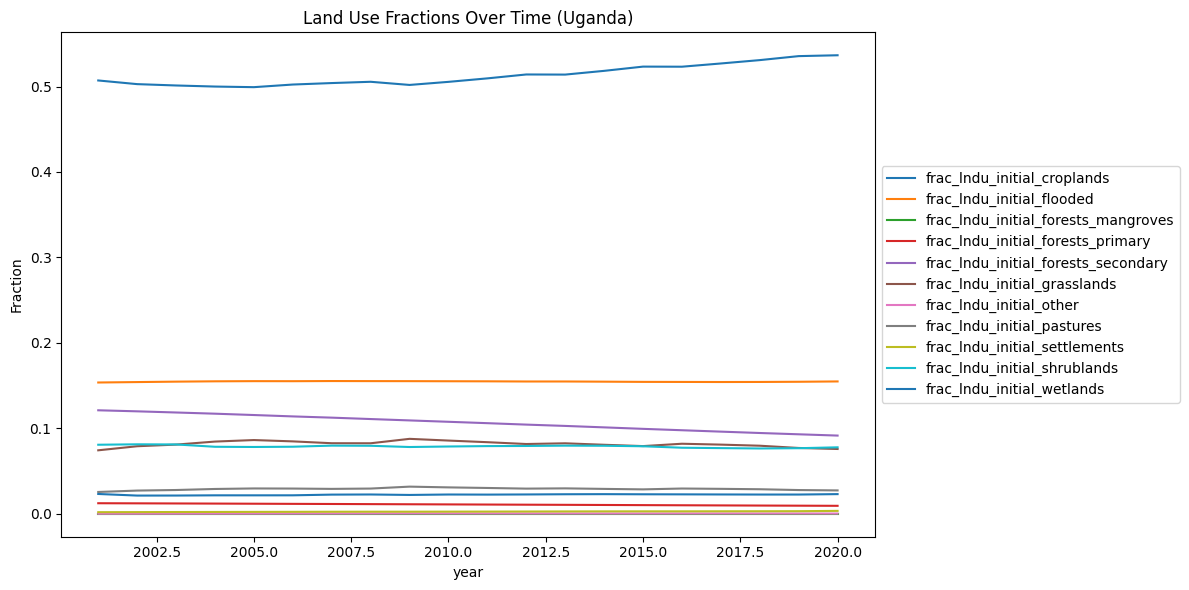

In [4]:
cols = land_use.columns[2:]  # Exclude 'year', 'iso_alpha_3'

land_use.plot(x='year', y=cols, kind='line', figsize=(12, 6))
plt.ylabel('Fraction')
plt.title('Land Use Fractions Over Time (Uganda)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [5]:
land_use.columns

Index(['iso_alpha_3', 'year', 'frac_lndu_initial_croplands',
       'frac_lndu_initial_flooded', 'frac_lndu_initial_forests_mangroves',
       'frac_lndu_initial_forests_primary',
       'frac_lndu_initial_forests_secondary', 'frac_lndu_initial_grasslands',
       'frac_lndu_initial_other', 'frac_lndu_initial_pastures',
       'frac_lndu_initial_settlements', 'frac_lndu_initial_shrublands',
       'frac_lndu_initial_wetlands'],
      dtype='object')

In [6]:
land_use.describe()

,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
count,20.00000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2010.50000,0.513082,0.154727,0.0,0.010884,0.106667,0.081586,0.000271,0.028997,0.002571,0.078836,0.022380
std,5.91608,0.012356,0.000464,0.0,0.000960,0.009411,0.003456,0.000082,0.001381,0.000396,0.001402,0.000575
min,2001.00000,0.499232,0.153635,0.0,0.009339,0.091528,0.074288,0.000105,0.025535,0.001888,0.076431,0.021322
25%,2005.75000,0.502663,0.154348,0.0,0.010101,0.098993,0.079549,0.000244,0.028390,0.002285,0.078055,0.021952
50%,2010.50000,0.508291,0.154822,0.0,0.010903,0.106852,0.081817,0.000300,0.029175,0.002556,0.078885,0.022549
75%,2015.25000,0.523198,0.155117,0.0,0.011669,0.114361,0.083969,0.000316,0.029593,0.002867,0.079642,0.022766
max,2020.00000,0.536565,0.155343,0.0,0.012359,0.121123,0.087704,0.000380,0.031784,0.003410,0.081314,0.023195


## UGANDA BUREAU OF STATISTIC (2023)

This information is taken from the Uganda Bureau of Statistics (2023), specifically from the table: FIGURE 1.1: LAND COVER AREA BY TYPE, 2005–2019 (HA)

In [7]:
data = pd.read_csv(input_data.joinpath("UGA_land_cover_BOS.csv"))
data.head()

,land_cover,area_05,area_10,area_15,area_17,area_19,frac_05,frac_10,frac_15,frac_17,frac_19
0,Forestry,3604219,2199311,1983990,2025453,2729159,0.149210,0.091253,0.081860,0.083603,0.112984
1,Bushland,2968685,2317176,1970692,1664429,273405,0.122900,0.096143,0.081311,0.068701,0.011319
2,Grassland,4063594,5068296,5139796,5121004,5531494,0.168228,0.210291,0.212070,0.211375,0.228997
3,Wetland,753038,810445,716721,867503,877337,0.031175,0.033627,0.029572,0.035807,0.036321
4,Agriculture,8954269,9907139,10531491,10655654,10772878,0.370695,0.411061,0.434533,0.439823,0.445983


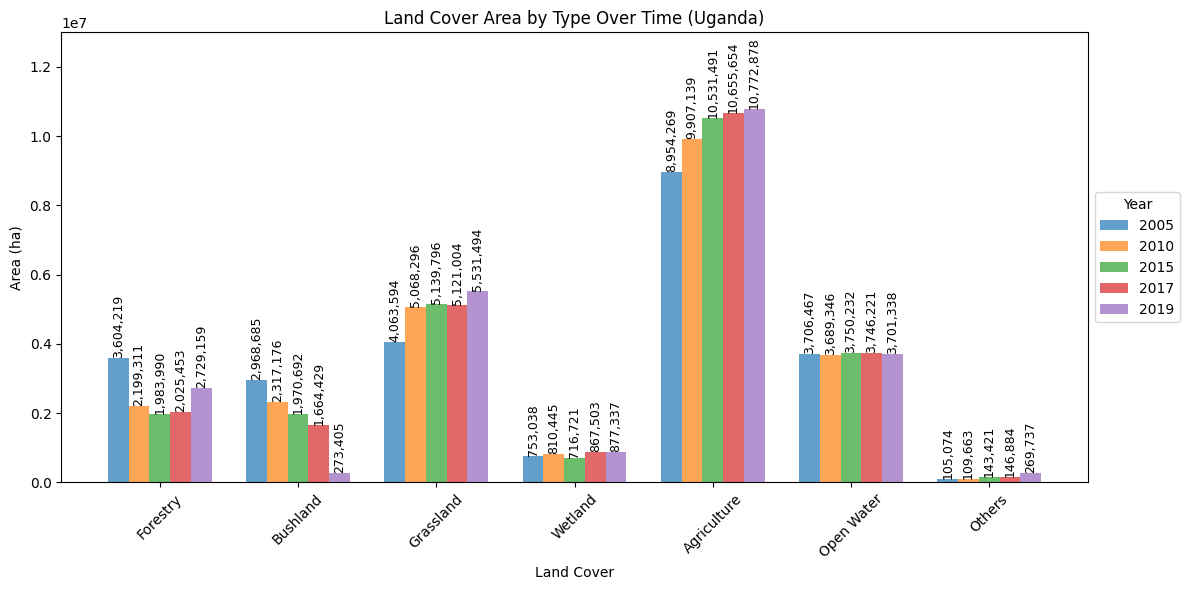

In [8]:
years = [2005, 2010, 2015, 2017, 2019]

# plot land cover area by type over time
area_cols = [f'area_{str(y)[-2:]}' for y in years]  # ['area_05', 'area_10', ...]
width = 0.15
x = np.arange(len(data['land_cover']))

fig, ax = plt.subplots(figsize=(12, 6))
for i, (col, year) in enumerate(zip(area_cols, years)):
    bars = ax.bar(x + i*width, data[col], width, label=str(year), alpha=0.7)
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9, rotation=90
        )

ax.set_xticks(x + width*2)
ax.set_xticklabels(data['land_cover'], rotation=45)
ax.set_xlabel('Land Cover')
ax.set_ylabel('Area (ha)')
ax.set_title('Land Cover Area by Type Over Time (Uganda)')
ax.set_ylim(0, 13e6)  
ax.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

| National Category (UG) | Category `frac_lndu_initial_*` | Comment                                        |
| ---------------------- | ---------------------------------------------------| --------------------------------------------------------------------- |
| **Forestry**           | `frac_lndu_initial_forests_primary`<br>`frac_lndu_initial_forests_secondary`<br>`frac_lndu_initial_forests_mangroves` | This group is already distributed using internal proportions.         |
| **Bushland**           | `frac_lndu_initial_shrublands`                                                                                        | Equivalent in structure to shrub vegetation.                          |
| **Grassland**          | `frac_lndu_initial_grasslands`<br> `frac_lndu_initial_pastures`                                                       | Direct match.                                                        |
| **Wetland**            | `frac_lndu_initial_wetlands`                                                                                          | Direct match.                                                        |
| **Agriculture**        | `frac_lndu_initial_croplands` |                                                                                       |
| **Open Water**         | `frac_lndu_initial_flooded`                                                                                           | Refers to permanent water bodies (lakes, reservoirs, etc.).          |
| **Others**             | `frac_lndu_initial_other`<br> `frac_lndu_initial_settlements`                                | Only "other" is used for national adaptation; settlements are not included in the BOS table. |


In [9]:
land_use.columns

Index(['iso_alpha_3', 'year', 'frac_lndu_initial_croplands',
       'frac_lndu_initial_flooded', 'frac_lndu_initial_forests_mangroves',
       'frac_lndu_initial_forests_primary',
       'frac_lndu_initial_forests_secondary', 'frac_lndu_initial_grasslands',
       'frac_lndu_initial_other', 'frac_lndu_initial_pastures',
       'frac_lndu_initial_settlements', 'frac_lndu_initial_shrublands',
       'frac_lndu_initial_wetlands'],
      dtype='object')

In [10]:
# Correspondence dictionary 
match_dict = {
    'Forestry':    [ 'frac_lndu_initial_forests_primary', 'frac_lndu_initial_forests_secondary', 'frac_lndu_initial_forests_mangroves'],
    'Bushland':    ['frac_lndu_initial_shrublands'],
    'Grassland':   ['frac_lndu_initial_grasslands', 'frac_lndu_initial_pastures'],
    'Wetland':     ['frac_lndu_initial_wetlands'],
    'Agriculture': ['frac_lndu_initial_croplands'],
    'Open Water':  ['frac_lndu_initial_flooded'],
    'Others':      ['frac_lndu_initial_other', 'frac_lndu_initial_settlements']
}

# years to consider
years = [2005, 2010, 2015, 2017, 2019]

adapted_data = []

# Iterate over each aggregated category
for category, cols in match_dict.items():
    
    # Get the national fraction by year for this category
    cat_fracs = {
        y: float(data.loc[data['land_cover'] == category, f'frac_{str(y)[-2:]}'])
        for y in years
    }
    
    if len(cols) == 1:
        # Only one column → assign directly
        for y in years:
            adapted_data.append({
                'year': y,
                'variable': cols[0],
                'value': cat_fracs[y]
            })
    else:
        # Multiple columns → distribute according to current proportions
        sum_group = land_use[cols].sum(axis=1)
        group_props = land_use[cols].div(sum_group, axis=0)
        group_props['year'] = land_use['year']

        for y in years:
            props = group_props.loc[group_props['year'] == y, cols].iloc[0]
            adapted_vals = props * cat_fracs[y]
            for var, val in adapted_vals.items():
                adapted_data.append({
                    'year': y,
                    'variable': var,
                    'value': val
                })

adapted_df = pd.DataFrame(adapted_data)
pivot_df = adapted_df.pivot(index='year', columns='variable', values='value')


In [11]:
pivot_df_reset = pivot_df.reset_index()
pivot_df_reset.head()

variable,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
0,2005,0.370695,0.153443,0.0,0.013815,0.135395,0.125195,0.000365,0.043033,0.003985,0.122900,0.031175
1,2010,0.411061,0.153076,0.0,0.008449,0.082804,0.154543,0.000566,0.055748,0.003984,0.096143,0.033627
2,2015,0.434533,0.154736,0.0,0.007579,0.074281,0.155850,0.000561,0.056220,0.005357,0.081311,0.029572
3,2017,0.439823,0.154629,0.0,0.007741,0.075862,0.155339,0.000627,0.056035,0.005435,0.068701,0.035807
4,2019,0.445983,0.153231,0.0,0.010461,0.102523,0.168290,0.000998,0.060707,0.010168,0.011319,0.036321


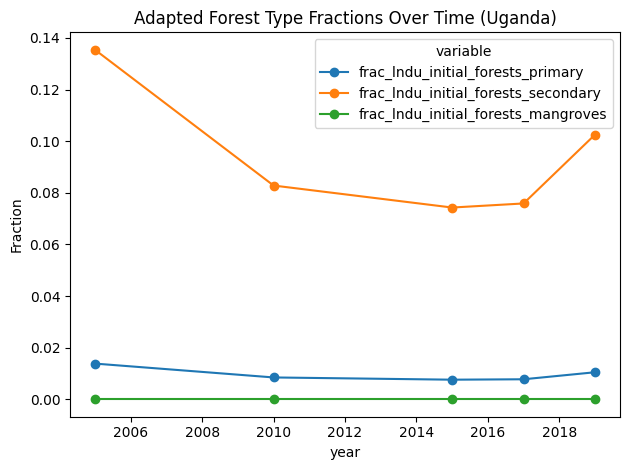

In [12]:
# Forestry
pivot_df[match_dict['Forestry']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Forest Type Fractions Over Time (Uganda)')
plt.tight_layout()
plt.show()

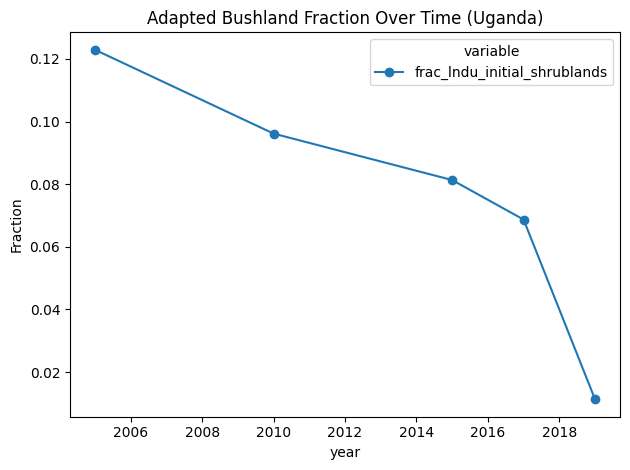

In [13]:
# Bushland
pivot_df[match_dict['Bushland']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Bushland Fraction Over Time (Uganda)')
plt.tight_layout()
plt.show()


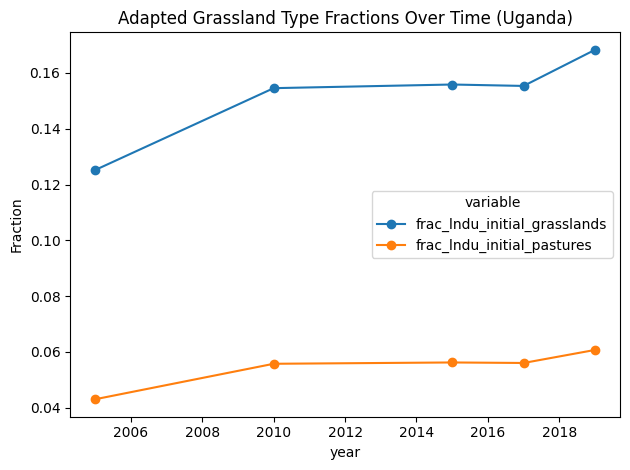

In [14]:
# Grassland
pivot_df[match_dict['Grassland']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Grassland Type Fractions Over Time (Uganda)')
plt.tight_layout()
plt.show()

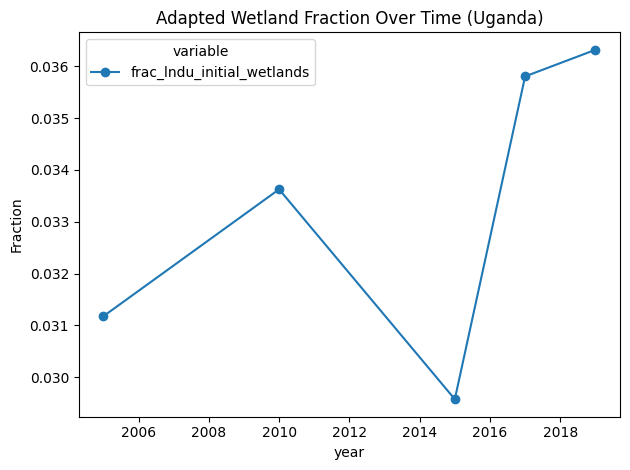

In [15]:
# Wetland
pivot_df[match_dict['Wetland']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Wetland Fraction Over Time (Uganda)')
plt.tight_layout()
plt.show()

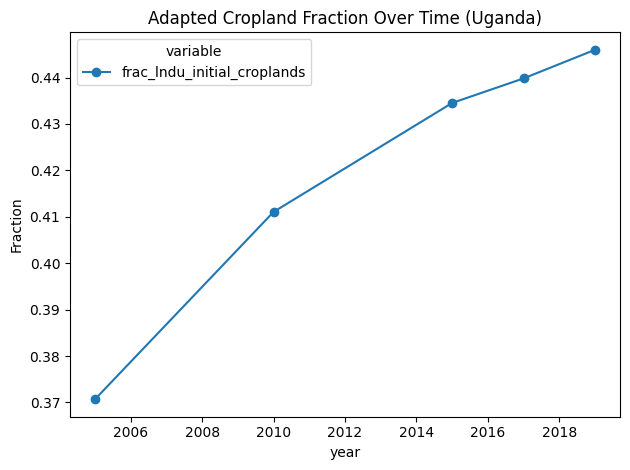

In [16]:
# Agriculture
pivot_df[match_dict['Agriculture']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Cropland Fraction Over Time (Uganda)')
plt.tight_layout()
plt.show()


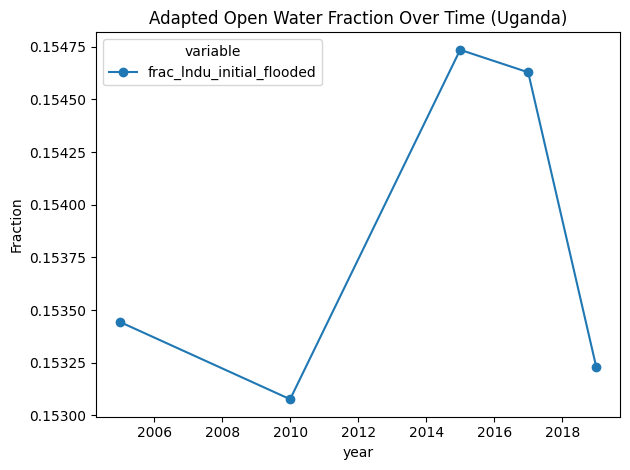

In [17]:
# Open Water
pivot_df[match_dict['Open Water']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Open Water Fraction Over Time (Uganda)')
plt.tight_layout()
plt.show()

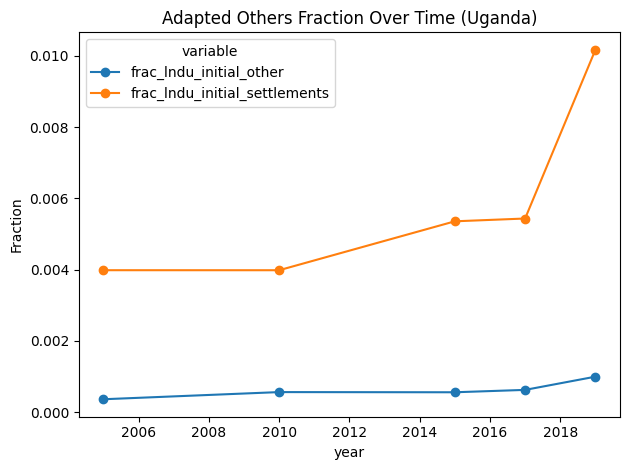

In [18]:
#Others
pivot_df[match_dict['Others']].plot(marker='o')
plt.ylabel('Fraction')
plt.title('Adapted Others Fraction Over Time (Uganda)')
plt.tight_layout()
plt.show()


In [19]:
# Review the total fraction for each year
pivot_df.sum(axis=1)

year
2005    1.0
2010    1.0
2015    1.0
2017    1.0
2019    1.0
dtype: float64

In [20]:
year = pivot_df.index.tolist()
print(year)

[2005, 2010, 2015, 2017, 2019]


In [21]:
pivot_df.head()

variable,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
year,,,,,,,,,,,
2005,0.370695,0.153443,0.0,0.013815,0.135395,0.125195,0.000365,0.043033,0.003985,0.122900,0.031175
2010,0.411061,0.153076,0.0,0.008449,0.082804,0.154543,0.000566,0.055748,0.003984,0.096143,0.033627
2015,0.434533,0.154736,0.0,0.007579,0.074281,0.155850,0.000561,0.056220,0.005357,0.081311,0.029572
2017,0.439823,0.154629,0.0,0.007741,0.075862,0.155339,0.000627,0.056035,0.005435,0.068701,0.035807
2019,0.445983,0.153231,0.0,0.010461,0.102523,0.168290,0.000998,0.060707,0.010168,0.011319,0.036321


In [22]:
df_universe_years = pd.DataFrame(
    {
        'year': range(2015, 2101)
    }
)
 
pivot_df = pd.merge(
    df_universe_years,
    pivot_df.reset_index(),
    how = "left",
)

pivot_df.head(50)

,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
0,2015,0.434533,0.154736,0.0,0.007579,0.074281,0.155850,0.000561,0.056220,0.005357,0.081311,0.029572
1,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,0.439823,0.154629,0.0,0.007741,0.075862,0.155339,0.000627,0.056035,0.005435,0.068701,0.035807
3,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,0.445983,0.153231,0.0,0.010461,0.102523,0.168290,0.000998,0.060707,0.010168,0.011319,0.036321
5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_r = (
    pivot_df
    .interpolate(
        method = "linear",
        limit_direction = "forward",  
    )
    .bfill()
)
df_r.head()

,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
0,2015,0.434533,0.154736,0.0,0.007579,0.074281,0.155850,0.000561,0.056220,0.005357,0.081311,0.029572
1,2016,0.437178,0.154682,0.0,0.007660,0.075071,0.155595,0.000594,0.056128,0.005396,0.075006,0.032690
2,2017,0.439823,0.154629,0.0,0.007741,0.075862,0.155339,0.000627,0.056035,0.005435,0.068701,0.035807
3,2018,0.442903,0.153930,0.0,0.009101,0.089192,0.161814,0.000813,0.058371,0.007802,0.040010,0.036064
4,2019,0.445983,0.153231,0.0,0.010461,0.102523,0.168290,0.000998,0.060707,0.010168,0.011319,0.036321


In [24]:
df_r.tail()

,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
81,2096,0.445983,0.153231,0.0,0.010461,0.102523,0.16829,0.000998,0.060707,0.010168,0.011319,0.036321
82,2097,0.445983,0.153231,0.0,0.010461,0.102523,0.16829,0.000998,0.060707,0.010168,0.011319,0.036321
83,2098,0.445983,0.153231,0.0,0.010461,0.102523,0.16829,0.000998,0.060707,0.010168,0.011319,0.036321
84,2099,0.445983,0.153231,0.0,0.010461,0.102523,0.16829,0.000998,0.060707,0.010168,0.011319,0.036321
85,2100,0.445983,0.153231,0.0,0.010461,0.102523,0.16829,0.000998,0.060707,0.010168,0.011319,0.036321


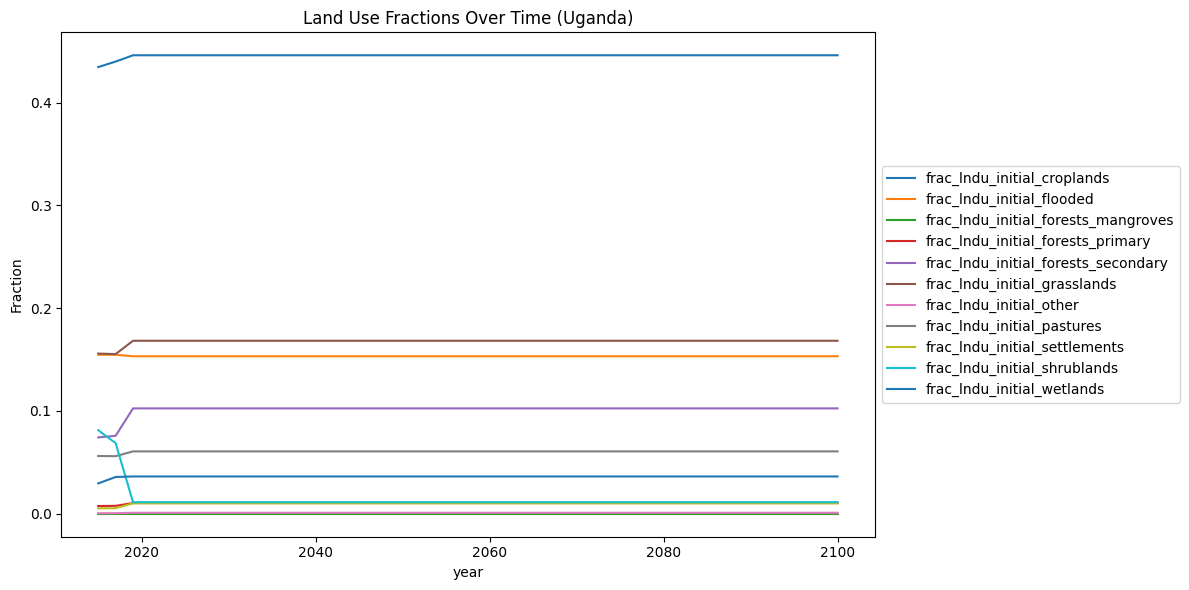

In [25]:
cols = land_use.columns[2:] 
ax = df_r.plot(x='year', y=cols, kind='line', figsize=(12, 6))
plt.ylabel('Fraction')
plt.title('Land Use Fractions Over Time (Uganda)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [26]:
cols_df_r = [c for c in df_r.columns if c.startswith("frac_lndu_initial")]
cols_reshaped = [c for c in land_use.columns if c.startswith("frac_lndu_initial")]

print("In df_r but not in land_use:", set(cols_df_r) - set(cols_reshaped))
print("In land_use but not in df_r:", set(cols_reshaped) - set(cols_df_r))

In df_r but not in land_use: set()
In land_use but not in df_r: set()


In [27]:
df_r = df_r[['year'] + [c for c in df_r.columns if c.startswith('frac_lndu_initial')]]
df_r.head()

,year,frac_lndu_initial_croplands,frac_lndu_initial_flooded,frac_lndu_initial_forests_mangroves,frac_lndu_initial_forests_primary,frac_lndu_initial_forests_secondary,frac_lndu_initial_grasslands,frac_lndu_initial_other,frac_lndu_initial_pastures,frac_lndu_initial_settlements,frac_lndu_initial_shrublands,frac_lndu_initial_wetlands
0,2015,0.434533,0.154736,0.0,0.007579,0.074281,0.155850,0.000561,0.056220,0.005357,0.081311,0.029572
1,2016,0.437178,0.154682,0.0,0.007660,0.075071,0.155595,0.000594,0.056128,0.005396,0.075006,0.032690
2,2017,0.439823,0.154629,0.0,0.007741,0.075862,0.155339,0.000627,0.056035,0.005435,0.068701,0.035807
3,2018,0.442903,0.153930,0.0,0.009101,0.089192,0.161814,0.000813,0.058371,0.007802,0.040010,0.036064
4,2019,0.445983,0.153231,0.0,0.010461,0.102523,0.168290,0.000998,0.060707,0.010168,0.011319,0.036321


In [28]:
df_r.to_csv(output_data.joinpath("frac_lndu_initial.csv"), index=False)